In [1]:
import anndata
import scanpy as sc
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from abc_atlas_access.abc_atlas_cache.abc_project_cache import AbcProjectCache

In [2]:
expr_path = '/data/scRNA/ABCA/AIBS/AWS/expression_matrices/WMB-10Xv3/20230630/processed/WMB-10Xv3-Isocortex-1-raw-wmeta.h5ad'
adata = sc.read_h5ad(expr_path)
adata

AnnData object with n_obs × n_vars = 227670 × 32285
    obs: 'cell_barcode', 'barcoded_cell_sample_label', 'library_label', 'feature_matrix_label', 'entity', 'brain_section_label', 'library_method', 'region_of_interest_acronym', 'donor_label', 'donor_genotype', 'donor_sex', 'dataset_label', 'x', 'y', 'cluster_alias', 'neurotransmitter', 'class', 'subclass', 'supertype', 'cluster', 'neurotransmitter_color', 'class_color', 'subclass_color', 'supertype_color', 'cluster_color', 'region_of_interest_order', 'region_of_interest_color'
    var: 'gene_symbol'

In [3]:
adata.obs.head()

,cell_barcode,barcoded_cell_sample_label,library_label,feature_matrix_label,entity,brain_section_label,library_method,region_of_interest_acronym,donor_label,donor_genotype,...,subclass,supertype,cluster,neurotransmitter_color,class_color,subclass_color,supertype_color,cluster_color,region_of_interest_order,region_of_interest_color
cell_label,,,,,,,,,,,,,,,,,,,,,
GCACTAAGTACAAGTA-399_B02,GCACTAAGTACAAGTA,399_B02,L8TX_201022_01_H06,WMB-10Xv3-Isocortex-1,cell,NaN,10Xv3,RSP,Snap25-IRES2-Cre;Ai14-546810,Snap25-IRES2-Cre/wt;Ai14(RCL-tdT)/wt,...,018 L2 IT PPP-APr Glut,0083 L2 IT PPP-APr Glut_4,0328 L2 IT PPP-APr Glut_4,#2B93DF,#FA0087,#0F6632,#3D65CC,#99CFFF,11,#E4FF26
CAGAGCCGTCCTGGTG-399_A02,CAGAGCCGTCCTGGTG,399_A02,L8TX_201023_01_A09,WMB-10Xv3-Isocortex-1,cell,NaN,10Xv3,RSP,Snap25-IRES2-Cre;Ai14-546810,Snap25-IRES2-Cre/wt;Ai14(RCL-tdT)/wt,...,018 L2 IT PPP-APr Glut,0083 L2 IT PPP-APr Glut_4,0328 L2 IT PPP-APr Glut_4,#2B93DF,#FA0087,#0F6632,#3D65CC,#99CFFF,11,#E4FF26
CGCCATTCACGACAGA-403_A06,CGCCATTCACGACAGA,403_A06,L8TX_201022_01_B07,WMB-10Xv3-Isocortex-1,cell,NaN,10Xv3,RSP,Snap25-IRES2-Cre;Ai14-547057,Snap25-IRES2-Cre/wt;Ai14(RCL-tdT)/wt,...,018 L2 IT PPP-APr Glut,0083 L2 IT PPP-APr Glut_4,0328 L2 IT PPP-APr Glut_4,#2B93DF,#FA0087,#0F6632,#3D65CC,#99CFFF,11,#E4FF26
GGGTTTATCCGATCGG-399_B02,GGGTTTATCCGATCGG,399_B02,L8TX_201022_01_H06,WMB-10Xv3-Isocortex-1,cell,NaN,10Xv3,RSP,Snap25-IRES2-Cre;Ai14-546810,Snap25-IRES2-Cre/wt;Ai14(RCL-tdT)/wt,...,018 L2 IT PPP-APr Glut,0083 L2 IT PPP-APr Glut_4,0328 L2 IT PPP-APr Glut_4,#2B93DF,#FA0087,#0F6632,#3D65CC,#99CFFF,11,#E4FF26
GTGTGATCAGACAAAT-399_B02,GTGTGATCAGACAAAT,399_B02,L8TX_201022_01_H06,WMB-10Xv3-Isocortex-1,cell,NaN,10Xv3,RSP,Snap25-IRES2-Cre;Ai14-546810,Snap25-IRES2-Cre/wt;Ai14(RCL-tdT)/wt,...,018 L2 IT PPP-APr Glut,0083 L2 IT PPP-APr Glut_4,0328 L2 IT PPP-APr Glut_4,#2B93DF,#FA0087,#0F6632,#3D65CC,#99CFFF,11,#E4FF26


In [4]:
def print_column_info(df):
    for c in df.columns:
        # Explicitly set observed=False to retain current behavior and suppress the warning
        grouped = df[[c]].groupby(c, observed=False).count()
        members = ''
        if len(grouped) < 30:
            members = str(list(grouped.index))
        print(f"Number of unique {c} = {len(grouped)} {members}")

In [5]:
print_column_info(adata.obs)

Number of unique cell_barcode = 220576 
Number of unique barcoded_cell_sample_label = 68 
Number of unique library_label = 68 
Number of unique feature_matrix_label = 1 ['WMB-10Xv3-Isocortex-1']
Number of unique entity = 1 ['cell']
Number of unique brain_section_label = 0 []
Number of unique library_method = 1 ['10Xv3']
Number of unique region_of_interest_acronym = 10 ['ACA', 'AI', 'AUD-TEa-PERI-ECT', 'MO-FRP', 'MOp', 'PL-ILA-ORB', 'RSP', 'SS-GU-VISC', 'VIS', 'VIS-PTLp']
Number of unique donor_label = 36 
Number of unique donor_genotype = 2 ['Ai14(RCL-tdT)/wt', 'Snap25-IRES2-Cre/wt;Ai14(RCL-tdT)/wt']
Number of unique donor_sex = 2 ['F', 'M']
Number of unique dataset_label = 1 ['WMB-10Xv3']
Number of unique x = 226998 
Number of unique y = 227247 
Number of unique cluster_alias = 677 
Number of unique neurotransmitter = 8 ['Chol', 'Dopa', 'GABA', 'GABA-Glyc', 'Glut', 'Glut-GABA', 'Hist', 'Nora']
Number of unique class = 24 ['01 IT-ET Glut', '02 NP-CT-L6b Glut', '03 OB-CR Glut', '04 DG-I

In [6]:
# def plot_umap(xx, yy, cc=None, val=None, fig_width=8, fig_height=8, cmap=None):

#     fig, ax = plt.subplots()
#     fig.set_size_inches(fig_width, fig_height)
    
#     if cmap is not None :
#         plt.scatter(xx, yy, s=0.5, c=val, marker='.', cmap=cmap)
#     elif cc is not None :
#         plt.scatter(xx, yy, s=0.5, color=cc, marker='.')
        
#     ax.axis('equal')
#     ax.set_xlim(-18, 27)
#     ax.set_ylim(-18, 27)
#     ax.set_xticks([])
#     ax.set_yticks([])
    
#     return fig, ax

In [11]:
# Updated Plot function to include Legends
from matplotlib.lines import Line2D
def plot_umap(xx, yy, cc=None, val=None, label_column=None, fig_width=6, fig_height=6, cmap=None):
    # Initialize plot with constrained layout to prevent overlap
    fig, ax = plt.subplots(constrained_layout=True)
    fig.set_size_inches(fig_width, fig_height)
    
    # Plot the data
    if cmap is not None:
        scatter = ax.scatter(xx, yy, s=0.5, c=val, marker='.', cmap=cmap)
    elif cc is not None:
        scatter = ax.scatter(xx, yy, s=0.5, color=cc, marker='.')
    else:
        scatter = ax.scatter(xx, yy, s=0.5, marker='.')
    
    # Set axis properties
    ax.axis('equal')
    # ax.set_xlim(-18, 27)
    # ax.set_ylim(-18, 27)
    ax.set_xticks([])
    ax.set_yticks([])
    
    # Add legend if label_column is provided
    if label_column is not None:
        # Create DataFrame for unique label-color pairs
        df_legend = pd.DataFrame({'label': label_column, 'color': cc}).drop_duplicates().sort_values('label')
        
        # Create legend handles
        legend_elements = [
            Line2D([0], [0], 
                   marker='o', 
                   color='w', 
                   label=row['label'],
                   markerfacecolor=row['color'], 
                   markersize=8)
            for _, row in df_legend.iterrows()
        ]
        
        # Add legend outside the plot (adjust bbox_to_anchor as needed)
        ax.legend(
            handles=legend_elements, 
            title="Legend", 
            loc="upper left",  # Anchor point for the legend
            bbox_to_anchor=(1.05, 1)  # Shift legend to the right of the plot
        )
    
    return fig, ax

In [7]:
cell_subsampled = adata.obs
print(len(cell_subsampled))

227670


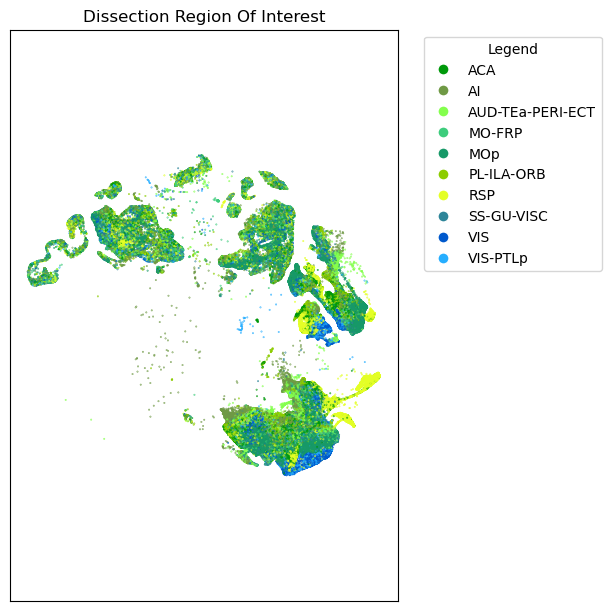

In [12]:
fig, ax = plot_umap(
    cell_subsampled['x'],
    cell_subsampled['y'],
    label_column = cell_subsampled['region_of_interest_acronym'],
    cc = cell_subsampled['region_of_interest_color'])
res = ax.set_title("Dissection Region Of Interest")
plt.show()

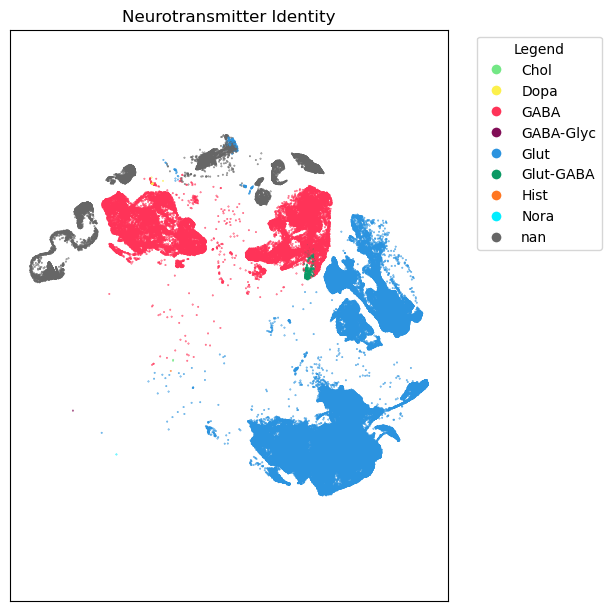

In [13]:
fig, ax = plot_umap(
    cell_subsampled['x'],
    cell_subsampled['y'],
    label_column = cell_subsampled['neurotransmitter'],
    cc = cell_subsampled['neurotransmitter_color'])
res = ax.set_title("Neurotransmitter Identity")
plt.show()

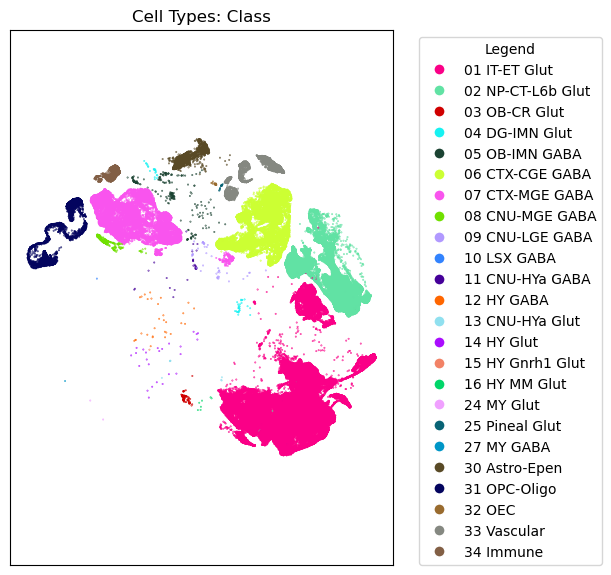

In [14]:
fig, ax = plot_umap(
    cell_subsampled['x'],
    cell_subsampled['y'],
    label_column = cell_subsampled['class'],
    cc = cell_subsampled['class_color'])
res = ax.set_title("Cell Types: Class")
plt.show()

/home/momo/miniforge3/envs/abca-env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or Axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


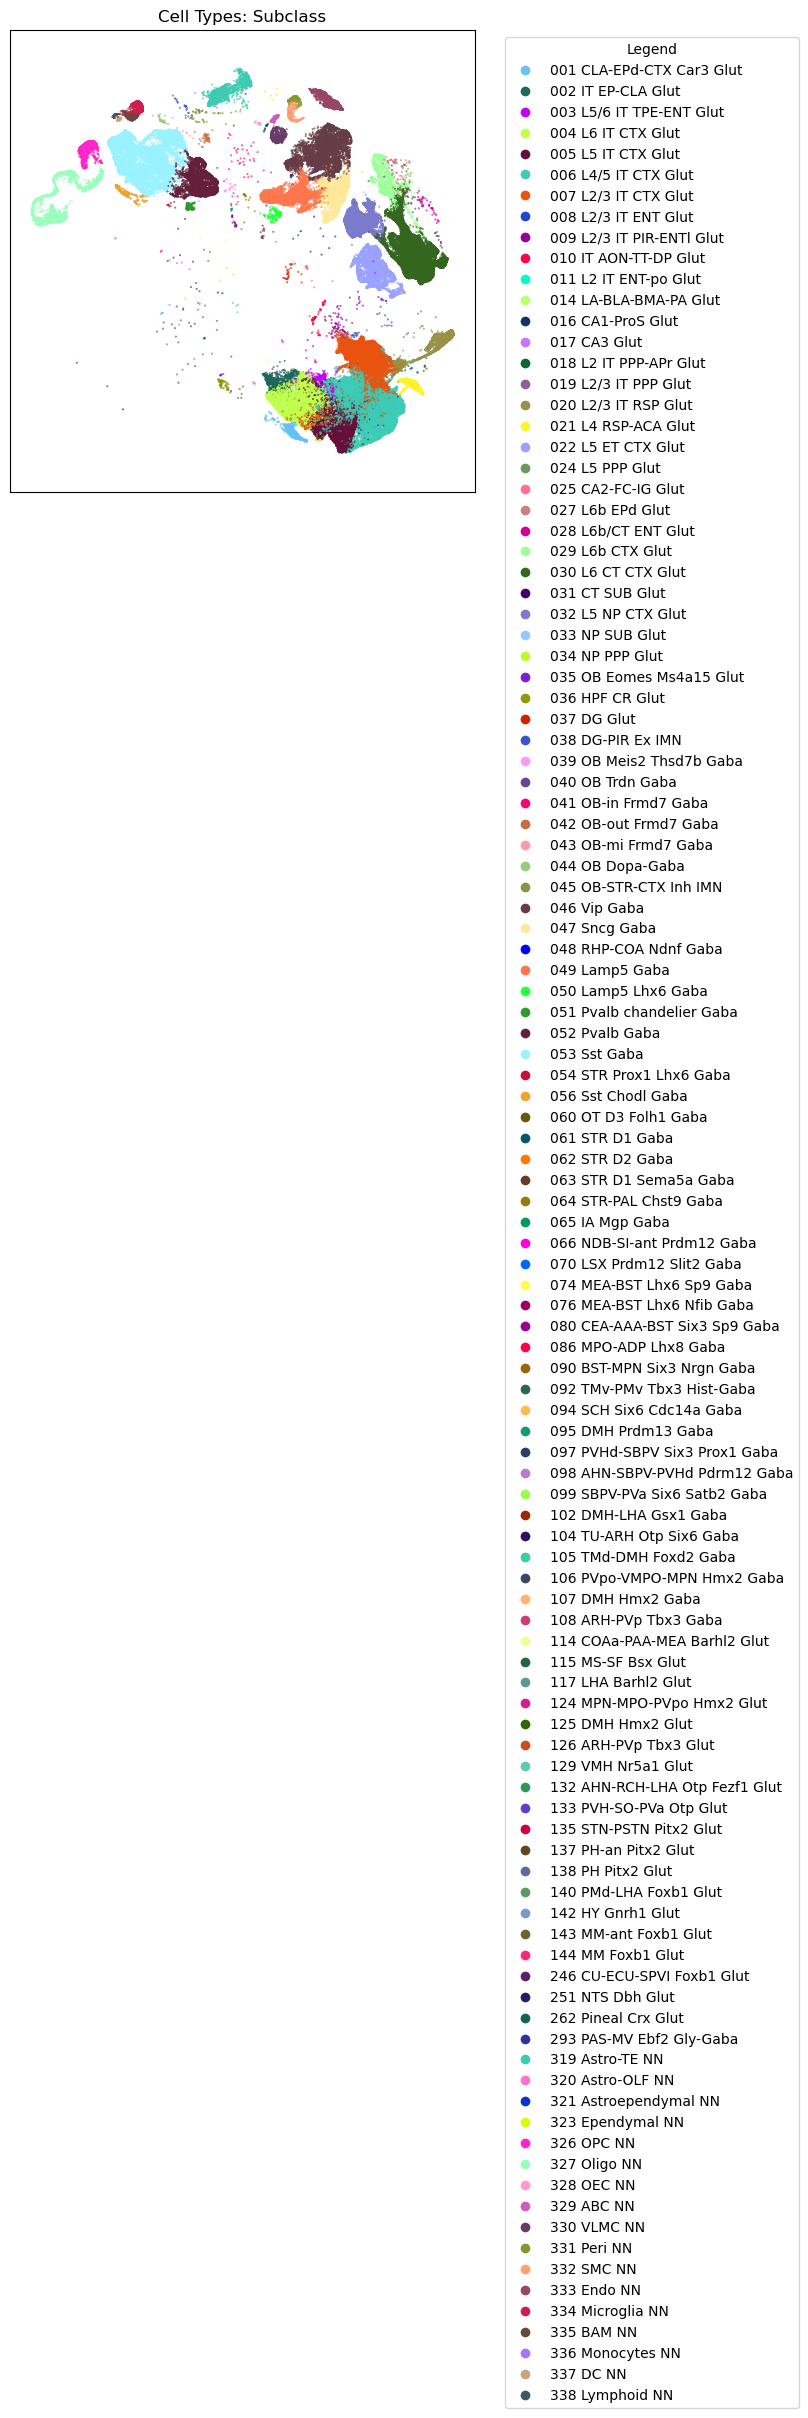

In [15]:
fig, ax = plot_umap(
    cell_subsampled['x'],
    cell_subsampled['y'],
    label_column = cell_subsampled['subclass'],
    cc = cell_subsampled['subclass_color'])
res = ax.set_title("Cell Types: Subclass")
plt.show()